2024-09-09 17:12:58.338544: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-09 17:12:58.338938: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-09 17:12:58.341019: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-09 17:12:58.347226: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-09 17:12:58.357638: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been 

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ batch_normalization             │ (None, 32, 32, 3)      │            12 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 30, 30, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 15, 15, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       131,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 502,157 (1.92 MB)

 Trainable params: 502,151 (1.92 MB)

 Non-trainable params: 6 (24.00 B)

Epoch 1/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 64ms/step - accuracy: 0.4595 - loss: 0.8614 - val_accuracy: 0.5814 - val_loss: 0.6759
Epoch 2/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.6395 - loss: 0.6473 - val_accuracy: 0.6744 - val_loss: 0.6689
Epoch 3/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8201 - loss: 0.5160 - val_accuracy: 0.7907 - val_loss: 0.6425
Epoch 4/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8729 - loss: 0.4012 - val_accuracy: 0.9070 - val_loss: 0.5832
Epoch 5/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.8791 - loss: 0.3796 - val_accuracy: 0.8372 - val_loss: 0.5258
Epoch 6/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.9041 - loss: 0.2959 - val_accuracy: 0.7674 - val_loss: 0.4979
Epoch 7/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8232 - loss: 0.3932 - val_accuracy: 0.7674 - val_loss: 0.5041
Epoch 8/200
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - accuracy: 0.8885 - loss: 0.2446 - val_accuracy: 0.7907 - val_loss:

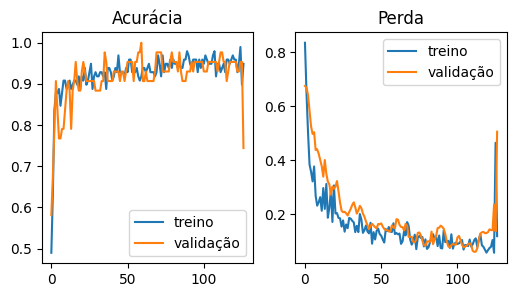

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 1.0000 - loss: 0.0213  
Accuracy: 100.00%
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


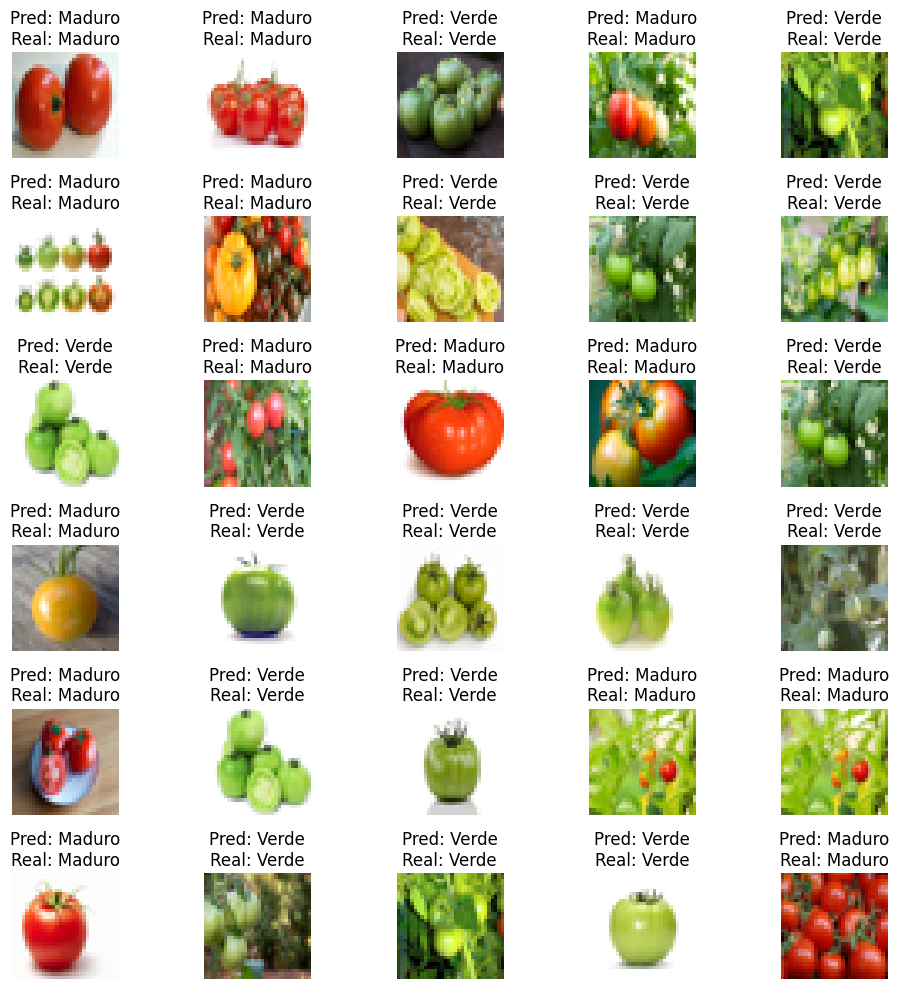

In [1]:
from PIL import Image
import numpy as np
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
import matplotlib.pyplot as plt

# Função para carregar imagens e rótulos usando Pillow
def load_data(images_dir, labels_dir):
    images = []
    labels = []
    for filename in os.listdir(images_dir):
        if filename.endswith('.jpeg'):
            img_path = os.path.join(images_dir, filename)
            label_file_path = os.path.join(labels_dir, filename.replace('.jpeg', '.txt'))
            if os.path.exists(label_file_path):
                img = Image.open(img_path).convert('RGB')
                img = img.resize((32, 32))  # Redimensionar para 32x32
                images.append(np.array(img))  # Acumula diretamente como array
                with open(label_file_path, 'r') as label_file:
                    label = int(label_file.readline().split()[0].strip())  # Apenas o rótulo
                    labels.append(label)
            else:
                print(f"Rótulo ausente para {filename}")
    return np.stack(images), np.array(labels)

# Caminhos para os diretórios
images_dir = '/home/cleanio/Documentos/Topicos Especiais/projeto/prediction_calories/cnn/Images'
labels_dir = '/home/cleanio/Documentos/Topicos Especiais/projeto/prediction_calories/cnn/labels'

# Carregar os dados
images, labels = load_data(images_dir, labels_dir)

# Normalizar as imagens
images = images.astype('float32') / 255.0

# Dividir os dados em treino e teste
data_train, data_test, labels_train, labels_test = train_test_split(images, labels, test_size=0.2, random_state=42)

# Modelo CNN
model = tf.keras.models.Sequential([
    tf.keras.layers.BatchNormalization(input_shape=data_train.shape[1:]),
    tf.keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(256, kernel_size=(3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.summary()
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# EarlyStopping
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

# Treinar o modelo
history = model.fit(data_train, labels_train, epochs=200, batch_size=32, validation_split=0.3, shuffle=True, callbacks=[early_stopping])
model.save('model_tomatoes.keras')

plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['treino', 'validação'])
plt.title('Acurácia')
plt.subplot(1,2,2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['treino', 'validação'])
plt.title('Perda')
plt.show()

# Salvar o modelo
model.save('model_tomatoes.keras')

model = tf.keras.models.load_model('model_tomatoes.keras')

score = model.evaluate(data_test, labels_test)
print("Accuracy: {:.2f}%".format(score[1] * 100))

# Prever e visualizar algumas amostras
predictions = model.predict(data_test)
predictions = (predictions > 0.5).astype('int32')

fig, axs = plt.subplots(6, 5, figsize=(10, 10))
axs = axs.ravel()

for i in range(30):
    axs[i].imshow(data_test[i])
    axs[i].set_title(f"Pred: {'Maduro' if predictions[i][0] == 1 else 'Verde'}\nReal: {'Maduro' if labels_test[i] == 1 else 'Verde'}")
    axs[i].axis('off')

plt.tight_layout()
plt.show()

